<a href="https://colab.research.google.com/github/Raqueljrp/Dise-o-Experimental/blob/main/202506_DCL_FORM4_RRey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2025**
# **Formato para Trabajar en Colab 2025**
# **Escribe el Nombre del Curso**: Diseño de Experimentos
## **Escribe tu nombre completo**: Raquel Jimena Rey Prada
> Email: rrey@utb.edu.co

> Celular:3006613549

> Código Estudiantil: T00057965

> Github:

## **TEMA: Diseños de Cuadrados Latinos - DCL**



<a name="inicio"></a>


## **1.** [Librerias básicas](#T1)
## **2.** [Ejemplo de un Diseños en Bloques Completos al Azar - DBCA](#T2)

## **3.** [El DataFrame de los datos](#T3)

## **4.** [Analisis descriptivo de la variable y ANOVA](#T4)

## **5.** [Acediendo a algunos atributos del DataFrame](#T5)

## **6.** [Análisis de Varianza - Anova](#T6)


## **7.** [Turkey Honestly Significant Difference (HSD)](#T7)

## **8.** [Least Significant Difference (LSD)](#T8)








[⬆️ Volver al inicio](#inicio)

<a name="T1"></a>
## **1. Librerías Básicas**

In [3]:
# @title **Librerias de Python**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


[⬆️ Volver al inicio](#inicio)

<a name="T2"></a>
## **2. Problema de un Diseños en Cuadrados Latinos - DCL**

Se quiere estudiar el efecto de cinco diferentes catalizadores (A, B, C, D y E) sobre el tiempo de reacción de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente los lotes y días. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11 | E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10 | C = 8 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10 |
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


### Hipótesis Nula (H₀)

La hipótesis nula en este experimento es que **no hay una diferencia estadísticamente significativa en el tiempo de reacción promedio** entre los cinco diferentes catalizadores (A, B, C, D y E).

Matemáticamente, esto se puede expresar como:

$ H_0: \mu_A = \mu_B = \mu_C = \mu_D = \mu_E $

Donde $\mu_i$ representa el tiempo de reacción promedio cuando se utiliza el catalizador $i$.

En el contexto de un Diseño en Cuadro Latino, también se asume que no hay un efecto significativo de los factores de bloqueo (lotes y días) en la variable de respuesta, *después de ajustar por el efecto de los catalizadores*. Sin embargo, la hipótesis nula principal se centra en el efecto de los tratamientos (catalizadores).

### Modelo Matemático para un Diseño en Cuadrado Latino (DCL)

El modelo lineal aditivo para un Diseño en Cuadro Latino es:

$ Y_{ijk} = \mu + \alpha_i + \beta_j + \gamma_k + \epsilon_{ijk} $

Donde:

*   $Y_{ijk}$: Es la respuesta observada en el i-ésimo lote, el j-ésimo día, y con el k-ésimo catalizador (tratamiento).
*   $\mu$: Es la media general del tiempo de reacción.
*   $\alpha_i$: Es el efecto del i-ésimo lote (factor de bloqueo de fila), donde $i = 1, 2, ..., 5$.
*   $\beta_j$: Es el efecto del j-ésimo día (factor de bloqueo de columna), donde $j = 1, 2, ..., 5$.
*   $\gamma_k$: Es el efecto del k-ésimo catalizador (tratamiento), donde $k = 1, 2, ..., 5$.
*   $\epsilon_{ijk}$: Es el error aleatorio asociado a la observación $Y_{ijk}$. Se asume que los errores son independientes, están distribuidos normalmente con media cero y varianza constante ($\epsilon_{ijk} \sim N(0, \sigma^2)$).

**Restricciones:**

Para que el modelo sea identificable, se suelen imponer restricciones, como:

$ \sum_{i=1}^{5} \alpha_i = 0 $
$ \sum_{j=1}^{5} \beta_j = 0 $
$ \sum_{k=1}^{5} \gamma_k = 0 $

Este modelo asume que no hay interacción entre los factores Lote, Día y Catalizador.

[⬆️ Volver al inicio](#inicio)

<a name="T3"></a>
## **3. El DataFrame de los datos**

In [5]:
# @title **Crear DataFrame**
# Define the data from the problem description
data = {
    'Lote': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5],
    'Dia': ['Día 1', 'Día 2', 'Día 3', 'Día 4', 'Día 5'] * 5,
    'Catalizador': ['A', 'B', 'D', 'C', 'E', 'C', 'E', 'A', 'D', 'B', 'B', 'A', 'C', 'C', 'D', 'D', 'C', 'E', 'B', 'A', 'E', 'D', 'B', 'A', 'C'],
    'Tiempo_Reaccion': [8, 7, 1, 7, 3, 11, 2, 7, 3, 8, 4, 9, 10, 8, 5, 6, 8, 6, 6, 10, 4, 2, 3, 8, 8]
}

# Create the DataFrame
df_reaccion = pd.DataFrame(data)

# Display the first few rows
print("DataFrame created successfully:")
display(df_reaccion.head())

# Display information about the DataFrame
print("\nDataFrame Info:")
df_reaccion.info()

DataFrame created successfully:


,Lote,Dia,Catalizador,Tiempo_Reaccion
0,1,Día 1,A,8
1,1,Día 2,B,7
2,1,Día 3,D,1
3,1,Día 4,C,7
4,1,Día 5,E,3



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lote             25 non-null     int64 
 1   Dia              25 non-null     object
 2   Catalizador      25 non-null     object
 3   Tiempo_Reaccion  25 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 932.0+ bytes


[⬆️ Volver al inicio](#inicio)

<a name="T4"></a>
## **4. Analisis descriptivo de la variable**

In [6]:
# **Analisis descriptivo de la variable**
df_reaccion.describe()


,Lote,Tiempo_Reaccion
count,25.000000,25.000000
mean,3.000000,6.160000
std,1.443376,2.779089
min,1.000000,1.000000
25%,2.000000,4.000000
50%,3.000000,7.000000
75%,4.000000,8.000000
max,5.000000,11.000000


[⬆️ Volver al inicio](#inicio)

<a name="T5"></a>
## **5. Acediendo a algunos atributos del DataFrame**

In [8]:
#@title **a Nombre de las columnas**
df_reaccion.columns

Index(['Lote', 'Dia', 'Catalizador', 'Tiempo_Reaccion'], dtype='object')

In [9]:
#@title **b Tipo de variables**
df_reaccion.dtypes

,0
Lote,int64
Dia,object
Catalizador,object
Tiempo_Reaccion,int64


In [10]:
#@title **c. Contar las observaciones de una de las variables**
df_reaccion["Lote"].value_counts()

,count
Lote,
1,5
2,5
3,5
4,5
5,5


In [11]:
#@title **d. Contar las observaciones**
df_reaccion["Catalizador"].value_counts()

,count
Catalizador,
C,6
A,5
B,5
D,5
E,4


In [12]:
#@title **e. Contar las observaciones**
df_reaccion["Dia"].value_counts()

,count
Dia,
Día 1,5
Día 2,5
Día 3,5
Día 4,5
Día 5,5


[⬆️ Volver al inicio](#inicio)

<a name="T6"></a>
## **6. Análisis de Varianza - Anova**


In [14]:
# @title **Análisis de Varianza (ANOVA) para Diseño en Cuadrado Latino**

# Convert categorical variables to 'category' dtype for proper handling in statsmodels formula
df_reaccion['Lote'] = df_reaccion['Lote'].astype('category')
df_reaccion['Dia'] = df_reaccion['Dia'].astype('category')
df_reaccion['Catalizador'] = df_reaccion['Catalizador'].astype('category')

# Define the ANOVA model for a Latin Square Design
# The formula includes effects for Lote, Dia, and Catalizador
# C() is used to specify that these are categorical variables
modelo_dcl = smf.ols('Tiempo_Reaccion ~ C(Lote) + C(Dia) + C(Catalizador)', data=df_reaccion).fit()

# Perform the ANOVA analysis
anova_table_dcl = sm.stats.anova_lm(modelo_dcl, typ=1) # Using typ=2 for Type II ANOVA

# Display the ANOVA table
print("Tabla ANOVA para el Diseño en Cuadrado Latino:")
display(anova_table_dcl)

Tabla ANOVA para el Diseño en Cuadrado Latino:


,df,sum_sq,mean_sq,F,PR(>F)
C(Lote),4.0,22.160000,5.540000,1.922884,0.171248
C(Dia),4.0,7.760000,1.940000,0.673356,0.623071
C(Catalizador),4.0,120.866923,30.216731,10.487952,0.000686
Residual,12.0,34.573077,2.881090,NaN,NaN


[⬆️ Volver al inicio](#inicio)

<a name="T7"></a>
## **7. Turkey Honestly Significant Difference (HSD)**

Resultados de la Prueba Tukey HSD para Catalizadores:


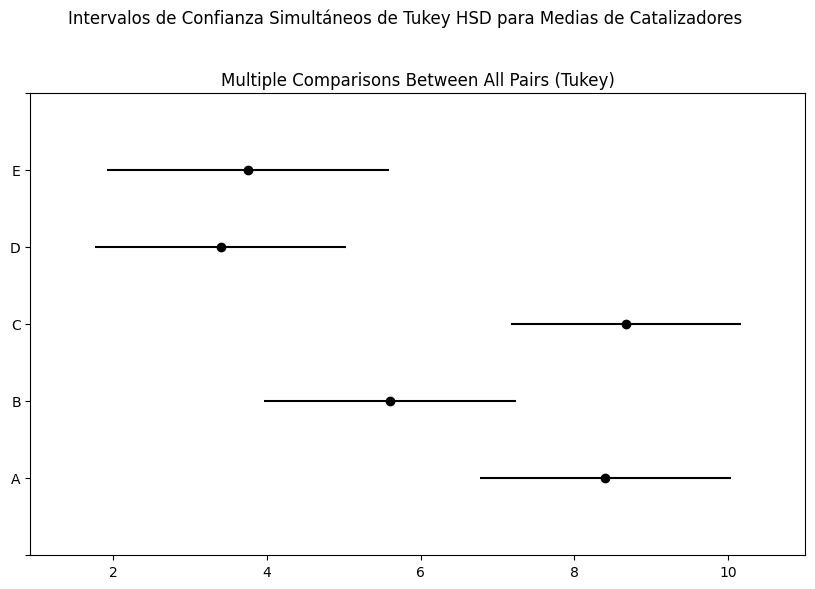

In [17]:
# @title **Prueba Tukey HSD para Comparar Medias de Catalizadores y Gráfica**

# Assuming the DataFrame is named 'df_reaccion'
try:
    # Perform Tukey's HSD test on the 'Tiempo_Reaccion' grouped by 'Catalizador'
    # We need the response variable and the group variable
    tukey_result = pairwise_tukeyhsd(endog=df_reaccion['Tiempo_Reaccion'], groups=df_reaccion['Catalizador'], alpha=0.05)

    # Display the results
    print("Resultados de la Prueba Tukey HSD para Catalizadores:")
    display(tukey_result)

    # Generate and display the plot
    fig = tukey_result.plot_simultaneous()
    fig.suptitle("Intervalos de Confianza Simultáneos de Tukey HSD para Medias de Catalizadores", y=1.02)
    plt.show()

except NameError:
    print("Error: El DataFrame 'df_reaccion' no se encontró.")
    print("Por favor, asegúrese de que la celda de creación del DataFrame se haya ejecutado correctamente.")
except Exception as e:
    print(f"An error occurred: {e}")

[⬆️ Volver al inicio](#inicio)

<a name="T8"></a>
## **8. Least Significant Difference (LSD)**

Valor crítico t: 2.1788
LSD (95% confianza): 2.5780


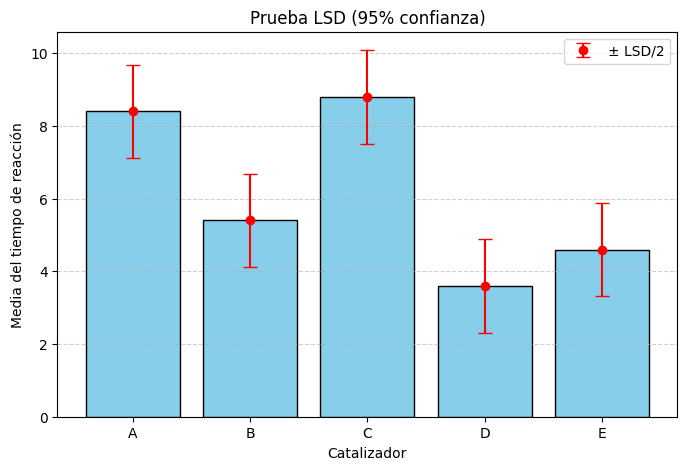

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# === DATOS: Medias de cada catalizador ===
medias = {
    "A": (8+7+9+10+8)/5,
    "B": (7+8+4+6+2)/5,
    "C": (7+11+10+8+8)/5,
    "D": (1+3+5+6+3)/5,
    "E": (3+2+8+6+4)/5
}
df_medias = pd.DataFrame(list(medias.items()), columns=["Catalizador", "Media"])

# === VALORES ANOVA (colócalos de tu tabla ANOVA) ===
MSE = 3.5      # <-- reemplaza con tu MSE real
gl_error = 12  # <-- reemplaza con tus GL del error
alpha = 0.05
r = 5          # repeticiones por tratamiento

# === Calculo de LSD ===
t_crit = t.ppf(1 - alpha/2, gl_error)
LSD = t_crit * np.sqrt(2 * MSE / r)

print(f"Valor crítico t: {t_crit:.4f}")
print(f"LSD (95% confianza): {LSD:.4f}")

# === GRAFICA LSD ===
plt.figure(figsize=(8,5))
plt.bar(df_medias["Catalizador"], df_medias["Media"], color="skyblue", edgecolor="black")
plt.errorbar(df_medias["Catalizador"], df_medias["Media"],
             yerr=LSD/2, fmt='o', color='red', capsize=5, label="± LSD/2")

plt.title("Prueba LSD (95% confianza)")
plt.ylabel("Media del tiempo de reacción")
plt.xlabel("Catalizador")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


[⬆️ Volver al inicio](#inicio)